<img src="images/csdms_logo.jpg">

# Examine the HydroTrend output

Let's use [IPython Notebook](http://ipython.org/notebook.html) to download the model output 
from the [WMT tutorial](http://csdms.colorado.edu/wiki/WMT_tutorial)
and examine the results.

The model output is stored as a **tar.gz** file on the CSDMS website. Here's its name and location:

In [10]:
download_file = 'addbbe35-5fd7-4d1b-a37d-3629768532b4.tar.gz'
download_url = 'http://csdms.colorado.edu/pub/users/wmt/' + download_file

Download the output and write it to a file on your local machine:

In [11]:
import requests
r = requests.get(download_url)
with open(download_file, 'w') as fp:
    fp.write(r.content)

Unpack the file:

In [12]:
import tarfile
tar = tarfile.open(download_file)
tar.extractall()
tar.close()

Change to the directory containing the unpacked contents and view:

In [13]:
import os
os.chdir(download_file.split('.')[0])
os.listdir('.')

['components.yaml', 'hydrotrend', 'model.yaml', 'README']

After browsing the **hydrotrend** directory, 
as well as consulting the 
[Model:HydroTrend](http://csdms.colorado.edu/wiki/Model:HydroTrend) and 
[Model_help:HydroTrend](http://csdms.colorado.edu/wiki/Model_help:HydroTrend) pages, 
the files we need are

    hydrotrend/HYDRO_OUTPUT/HYDROASCII.Q

for the discharge at the river mouth [m<sup>3</sup>s<sup>-1</sup>], and

    hydrotrend/_time.txt

for the model time steps [days].

Start by reading the time data from its file:

In [25]:
with open("hydrotrend/_time.txt", "r") as fp:
    time = fp.read().split("\n")

View basic information about the data:

In [28]:
print "Data type: {}".format(type(time))
print "Length: {} elements".format(len(time))
print "First five elements:\n{}".format(time[0:5])

Data type: <type 'list'>
Length: 367 elements
First five elements:
['0.000000', '1.000000', '2.000000', '3.000000', '4.000000']


Next, read the discharge data:

In [30]:
with open("hydrotrend/HYDRO_OUTPUT/HYDROASCII.Q", "r") as fp:
    discharge = fp.read().split("\n")

View basic information about the data:

In [31]:
print "Data type: {}".format(type(discharge))
print "Length: {} elements".format(len(discharge))
print "First five elements:\n{}".format(discharge[0:5])

Data type: <type 'list'>
Length: 368 elements
First five elements:
['Q(m^3/s) ', '--------- ', '1.100 ', '1.100 ', '1.100 ']


Prepare the data by removing the two header lines and the empty line at the end of the `discharge` series. Also remove the last two values in the `time` series. Both series now have 365 elements.

In [22]:
discharge = discharge[2:-1]
time = time[:-2]
print len(discharge), len(time)

365 365


Now we can visualize the model output as a time series: 

Populating the interactive namespace from numpy and matplotlib


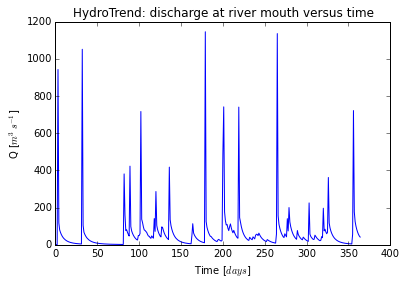

In [23]:
%pylab inline
plot(time, discharge)
title("HydroTrend: discharge at river mouth versus time")
xlabel("Time [$days$]")
ylabel("Q [$m^3 s^{-1}$]")
show()